In [1]:
import os
import sys
import subprocess
import numpy as np
import seaborn as sns
import json
import pandas as pd
import shutil
import librosa.display
import skimage.io
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from tqdm import tqdm

In [2]:
print(dir(skimage))

['__version__', 'color', 'data', 'data_dir', 'draw', 'exposure', 'feature', 'filters', 'future', 'graph', 'io', 'measure', 'metrics', 'morphology', 'registration', 'restoration', 'segmentation', 'transform', 'util', 'viewer']


In [3]:
import librosa
import numpy


def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled



In [4]:
df = pd.read_csv("/home/abhijeet/Desktop/extracted/train.csv")
df.head()

,id,path,file_status,covid_status,date,str_date,status
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...,Y,positive_mild,20210630,2021-06-30,positive
1,gFmySpqfQ7YrYqMrmrMPO7AzmBm1,/home/abhijeet/Desktop/extracted/20210630/gFmy...,Y,positive_mild,20210628,2021-06-28,positive
2,padXEGczMRRKmLRVc68rEKI142B3,/home/abhijeet/Desktop/extracted/20210630/padX...,Y,positive_mild,20210628,2021-06-28,positive
3,ymX9t6DWDHZTs28MODDSxDaOj4n2,/home/abhijeet/Desktop/extracted/20210630/ymX9...,Y,positive_mild,20210628,2021-06-28,positive
4,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...,Y,positive_mild,20210628,2021-06-28,positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2312 non-null   object
 1   path          2312 non-null   object
 2   file_status   2312 non-null   object
 3   covid_status  2312 non-null   object
 4   date          2312 non-null   int64 
 5   str_date      2312 non-null   object
 6   status        2312 non-null   object
dtypes: int64(1), object(6)
memory usage: 126.6+ KB


  5%|██▎                                       | 18/330 [00:14<04:35,  1.13it/s]

188


 12%|█████▏                                    | 41/330 [00:44<06:50,  1.42s/it]

211


 22%|█████████▏                                | 72/330 [01:43<09:38,  2.24s/it]

242


 44%|██████████████████                       | 145/330 [05:29<11:56,  3.87s/it]/tmp/ipykernel_6337/274844113.py:6: RuntimeWarning: invalid value encountered in true_divide
  X_std = (X - X.min()) / (X.max() - X.min())
 44%|██████████████████▏                      | 146/330 [05:30<08:43,  2.85s/it]

315


 46%|██████████████████▊                      | 151/330 [05:50<11:50,  3.97s/it]

321


 47%|███████████████████▏                     | 154/330 [05:55<07:05,  2.42s/it]

323
324


 52%|█████████████████████▏                   | 171/330 [06:59<08:21,  3.15s/it]

340


 68%|███████████████████████████▋             | 223/330 [12:37<11:54,  6.68s/it]

392


100%|█████████████████████████████████████████| 330/330 [26:10<00:00,  4.76s/it]


499


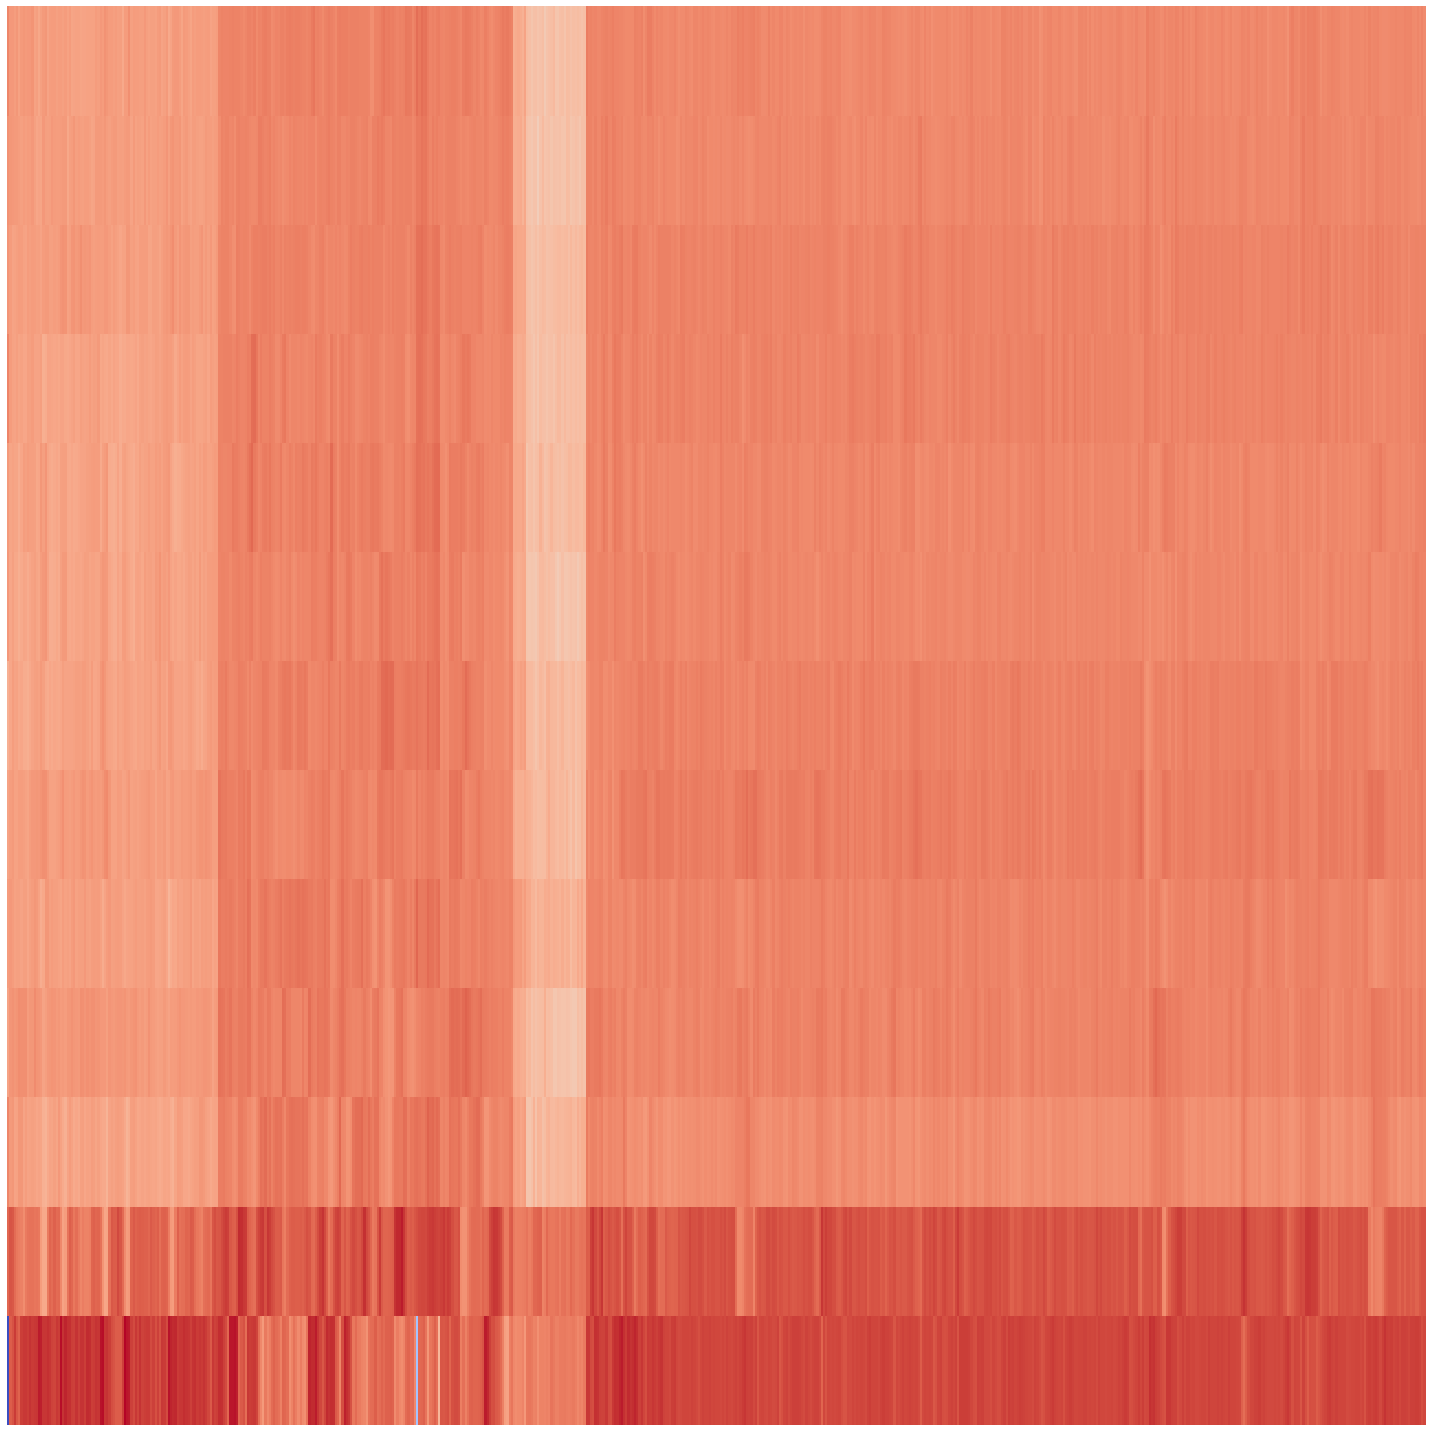

In [6]:
def scale_max(X):
    X_scale = X *0.9/np.abs(X+ 1e-12).max()
    return X_scale
path = '/home/abhijeet/Desktop/extracted/20210630/iOx0zPyPiMZjCWXuf3RGu8HKq8k1/cough-heavy.wav'
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True
# cmap = plt.get_cmap('inferno')
# tot_rows = train_csv.shape[0]
for i in tqdm(range(170,500)):
    try:
#     source = train_csv['file_properties'][i]
        filename = df.path[i]
        y, sr = librosa.load(filename, sr=22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        y_log_scaled = scale_minmax(y_log)
        mfcc = librosa.feature.mfcc(y =y_log_scaled, sr =sr, hop_length =1024, n_mfcc=13)
#         delta_mfccs = librosa.feature.delta(mfcc)
#         delta2_mfccs = librosa.feature.delta(mfcc ,order =2)


#         mfccs_features = np.concatenate((mfcc, delta_mfccs, delta2_mfccs))
        librosa.display.specshow(mfcc, sr=sr)
        plt.axis('off');
        plt.savefig("/home/abhijeet/Desktop/extracted/mfcc/" + filename[-53:-45] + "_"+ filename[-44:-16]+  "_mfcc.png")
#         plt.show()
    except :
        print(i)
        pass

In [8]:
filename[-53:-45], filename[-44:-16]

('20210630', 'iOx0zPyPiMZjCWXuf3RGu8HKq8k1')